In [1]:
import pandas as pd
%matplotlib inline

columns=['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars=pd.read_csv('imports-85.data', header=None, names=columns)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Target column is price. Columns that we can use as features: symboling, normalized_losses (maybe not this one since it has missing data), num_doors (converting to integers), wheel_base, length, width, height, curb_weight, num_cylinders (convert to int), engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg. Now not all of these may be suitable as features. 

In [2]:
import numpy as np
cars.replace('?', np.nan, inplace=True)
cars['normalized_losses']=cars['normalized_losses'].astype('float')
mean=cars['normalized_losses'].mean()
cars['normalized_losses'].replace(np.nan, mean, inplace=True)

'''
def value_counter(series):
    return cars[series].value_counts()

for series in cars.columns:
    value_counter(series)'''
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [3]:
cars.dropna(subset=['num_doors'], inplace=True)


small=cars[cars['engine_size']<120]
small['bore']=small['bore'].astype(float)
small['stroke']=small['stroke'].astype(float)
cars['stroke'].replace(np.nan, small['stroke'].mean(), inplace=True)
cars['bore'].replace(np.nan, small['bore'].mean(), inplace=True)
null_data = cars[cars.isnull().any(axis=1)]
null_data
cars=cars.dropna()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized_losses    197 non-null float64
make                 197 non-null object
fuel_type            197 non-null object
aspiration           197 non-null object
num_doors            197 non-null object
body_style           197 non-null object
drive_wheels         197 non-null object
engine_location      197 non-null object
wheel_base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb_weight          197 non-null int64
engine_type          197 non-null object
num_cylinders        197 non-null object
engine_size          197 non-null int64
fuel_system          197 non-null object
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    197 non-null float64
horsepower           197 non-nu

In [5]:
cars['bore']=cars['bore'].astype(float)
cars['stroke']=cars['stroke'].astype(float)
cars['horsepower']=cars['horsepower'].astype(int)
cars['peak_rpm']=cars['peak_rpm'].astype(int)
cars['price']=cars['price'].astype(int)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 26 columns):
symboling            197 non-null int64
normalized_losses    197 non-null float64
make                 197 non-null object
fuel_type            197 non-null object
aspiration           197 non-null object
num_doors            197 non-null object
body_style           197 non-null object
drive_wheels         197 non-null object
engine_location      197 non-null object
wheel_base           197 non-null float64
length               197 non-null float64
width                197 non-null float64
height               197 non-null float64
curb_weight          197 non-null int64
engine_type          197 non-null object
num_cylinders        197 non-null object
engine_size          197 non-null int64
fuel_system          197 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    197 non-null float64
horsepower           197 non-

Converted all necessary columns to numeric

In [6]:
'''['symboling', 'normalized_losses', 'wheel_base', 'length', '''''
columns_numeric=list()
for column in list(cars.columns):
    if cars[column].dtype!='object':
        columns_numeric.append(column)
columns_numeric

cars[columns_numeric]=(cars[columns_numeric]-cars[columns_numeric].min())/(cars[columns_numeric].max()-cars[columns_numeric].min())
cars[columns_numeric].head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training,target,df):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor()
    knn.fit(train_df[[training]], train_df[target])
    predictions=knn.predict(test_df[[training]])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

rmses=dict()
columns_numeric.remove('price')
for column in columns_numeric:
    rmses[column]=knn_train_test(column, 'price', cars)
min(rmses, key=rmses.get)
    

'curb_weight'

In [8]:
def knn_train_test(training,target,df,k):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training]], train_df[target])
    predictions=knn.predict(test_df[[training]])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

In [9]:
rmses_ks=dict()
for column in columns_numeric:
    for x in [1,3,5,7,9]:
        rmses_ks[column+'  k equals '+str(x)]=knn_train_test(column, 'price', cars, x)
rmses_ks    

{'bore  k equals 1': 0.28269263410227702,
 'bore  k equals 3': 0.2424003884854504,
 'bore  k equals 5': 0.21148722699401293,
 'bore  k equals 7': 0.19480284635505482,
 'bore  k equals 9': 0.16253503574990588,
 'city_mpg  k equals 1': 0.11272226611824102,
 'city_mpg  k equals 3': 0.099145516217973184,
 'city_mpg  k equals 5': 0.090568914962874114,
 'city_mpg  k equals 7': 0.088238532738654243,
 'city_mpg  k equals 9': 0.079337913566299934,
 'compression_ratio  k equals 1': 0.17330435982451683,
 'compression_ratio  k equals 3': 0.15245746252674569,
 'compression_ratio  k equals 5': 0.1680076551292515,
 'compression_ratio  k equals 7': 0.17403452473032704,
 'compression_ratio  k equals 9': 0.14914535945234048,
 'curb_weight  k equals 1': 0.093200497919210243,
 'curb_weight  k equals 3': 0.06314681407534993,
 'curb_weight  k equals 5': 0.06240155403604776,
 'curb_weight  k equals 7': 0.067886426461119864,
 'curb_weight  k equals 9': 0.066188721317248747,
 'engine_size  k equals 1': 0.12549

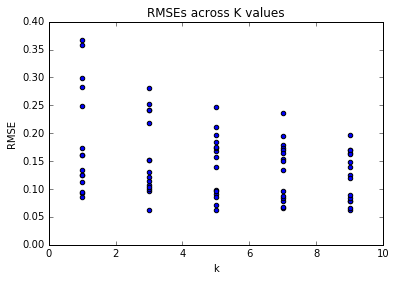

In [10]:
from matplotlib import pyplot as plt
import re

for key in rmses_ks:
    if 'equals 1' in key:
        plt.scatter(1, rmses_ks[key])
    if 'equals 3' in key:
        plt.scatter(3, rmses_ks[key])
    if 'equals 5' in key:
        plt.scatter(5, rmses_ks[key])
    if 'equals 7' in key:
        plt.scatter(7, rmses_ks[key])
    if 'equals 9' in key:
        plt.scatter(9, rmses_ks[key])
plt.title('RMSEs across K values')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

For this data, a higher K-value means a more accurate prediction measured from RMSE. 

In [11]:
def knn_train_test(training,target,df):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor()
    knn.fit(train_df[training], train_df[target])
    predictions=knn.predict(test_df[training])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

In [12]:
import operator

sorted_rmses = sorted(rmses.items(), key=operator.itemgetter(1))
sorted_rmses

[('curb_weight', 0.06240155403604776),
 ('highway_mpg', 0.071712000124226419),
 ('engine_size', 0.086057791257658348),
 ('city_mpg', 0.090568914962874114),
 ('width', 0.096260253872079954),
 ('horsepower', 0.09909079566629532),
 ('wheel_base', 0.14030101049502916),
 ('height', 0.15801574539052451),
 ('compression_ratio', 0.1680076551292515),
 ('length', 0.17397014156971405),
 ('peak_rpm', 0.17596221741247833),
 ('symboling', 0.18345457974791615),
 ('stroke', 0.19640346606007952),
 ('bore', 0.21148722699401293),
 ('normalized_losses', 0.24758869125978947)]

In [13]:
knn_train_test(['curb_weight', 'highway_mpg'],'price', cars)

0.079174056605375631

In [14]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars)

0.073017156348069198

In [15]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg'],'price', cars)

0.061681589424781837

In [16]:
knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg', 'width'],'price', cars)

0.057084661098346062

In [17]:
def knn_train_test(training,target,df,k):
    train_df=df.iloc[0:int(len(df)*.75)]
    test_df=df.iloc[int(len(df)*.75):len(df)]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training], train_df[target])
    predictions=knn.predict(test_df[training])
    mse=mean_squared_error(test_df[target], predictions)
    rmse=mse**(1/2)
    return rmse

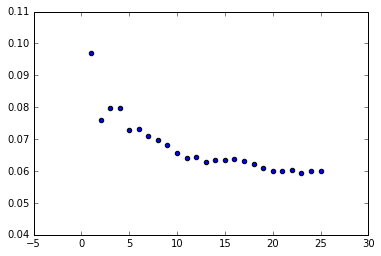

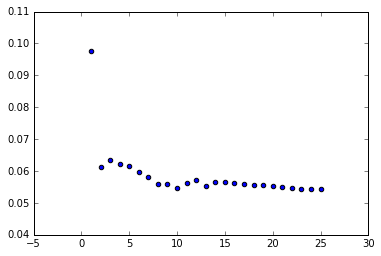

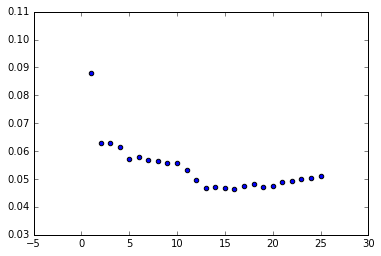

23
23


16

In [31]:
rmses_3features=dict()
for k in range(1,26):
    rmses_3features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size'],'price', cars, k)
plt.scatter(list(rmses_3features.keys()),list(rmses_3features.values()))
plt.show()

rmses_4features=dict()
for k in range(1,26):
    rmses_4features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg'],'price', cars, k)
plt.scatter(list(rmses_4features.keys()),list(rmses_4features.values()))
plt.show()

rmses_5features=dict()
for k in range(1,26):
    rmses_5features[k]=knn_train_test(['curb_weight', 'highway_mpg', 'engine_size', 'city_mpg', 'width'],'price', cars, k)
plt.scatter(list(rmses_5features.keys()),list(rmses_5features.values()))
plt.show()

print(min(rmses_3features, key=rmses_3features.get))
print(min(rmses_4features, key=rmses_4features.get))
min(rmses_5features, key=rmses_5features.get)

23 is the optimal k value for models with three and four features, but 16 is optimal for the five feature model. The complexity of the five feature model may interfere with higher k values being more accurate after a certain point.